**2.1**

The dataset used for this assignment is Loan_Default.csv, which contains loan application records with borrower, loan, and property-related attributes. Each observation represents a single loan applicant, and the dataset includes both numerical and categorical features such as loan amount, interest rate, income, credit score, loan-to-value ratio, debt-to-income ratio, loan purpose, and demographic variables.

The target variable is **Status**, which indicates whether a loan default occurred.
https://www.kaggle.com/datasets/yasserh/loan-default-dataset?resource=download

Exploratory Data Analysis (EDA) was performed to understand the structure of the dataset, identify missing values, examine feature distributions, and assess potential multicollinearity among predictors. Since logistic regression is sensitive to highly correlated input features, multicollinearity can inflate coefficient variance and reduce model interpretability.

To quantify multicollinearity, Variance Inflation Factor (VIF) was computed for the numerical predictors. VIF measures how much the variance of a regression coefficient is increased due to correlation with other features and is defined as:

$\text{VIF}_j = \frac{1}{1 - R_j^2}$

where $R_j^2$ is the coefficient of determination obtained by regressing feature
j on all other predictors. A VIF value greater than 5 indicates moderate multicollinearity, while values above 10 suggest severe multicollinearity.

Features with high VIF values were examined and addressed by removing redundant variables or retaining the most interpretable feature among highly correlated groups. This process improves the numerical stability and interpretability of the logistic regression model.

**2.2**

In [ ]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Loan_Default.csv")
df.head()


Saving Loan_Default.csv to Loan_Default.csv


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Upfront_charges,39642
Interest_rate_spread,36639
rate_of_interest,36439
dtir1,24121
property_value,15098
LTV,15098
income,9150
loan_limit,3344
approv_in_adv,908
age,200


In [ ]:
missing_ratio = numeric_df.isnull().mean()
missing_ratio.sort_values(ascending=False)


,0
Upfront_charges,0.266644
Interest_rate_spread,0.246445
rate_of_interest,0.245100
dtir1,0.162245
LTV,0.101554
property_value,0.101554
income,0.061546
term,0.000276
ID,0.000000
year,0.000000


In [ ]:
numeric_df = df.select_dtypes(include=[np.number])

X = numeric_df.drop(columns=["Status"])
X = X.replace([np.inf, -np.inf], np.nan)
X_vif = X.dropna()


In [ ]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_vif = add_constant(X_vif)

vif_data = pd.DataFrame({
    "Feature": X_vif.columns,
    "VIF": [variance_inflation_factor(X_vif.values, i)
            for i in range(X_vif.shape[1])]
})

vif_data.sort_values(by="VIF", ascending=False)


,Feature,VIF
1,year,178.891849
7,property_value,5.537061
2,loan_amount,4.883352
10,LTV,2.630708
4,Interest_rate_spread,2.197970
3,rate_of_interest,1.972368
8,income,1.509273
6,term,1.407850
11,dtir1,1.185117
5,Upfront_charges,1.053188


In [ ]:
X_vif_reduced = X_vif.drop(columns=["year"])
X_vif_reduced = X_vif_reduced.drop(columns=["ID"])

vif_reduced = pd.DataFrame({
    "Feature": X_vif_reduced.columns,
    "VIF": [
        variance_inflation_factor(X_vif_reduced.values, i)
        for i in range(X_vif_reduced.shape[1])
    ]
})

vif_reduced.sort_values(by="VIF", ascending=False)


,Feature,VIF
1,rate_of_interest,75.945958
4,term,44.468279
8,LTV,35.548742
7,Credit_Score,29.449878
0,loan_amount,20.092075
9,dtir1,16.676259
5,property_value,15.274669
2,Interest_rate_spread,3.854774
6,income,3.486423
3,Upfront_charges,2.070052


Note that while the above values are extremely high, it is to be expected based on the relationships that exist between these features in real-life financial scenarios.

**2.3**

Visualization 1: Correlation Heatmap with Clustering

A clustered correlation heatmap was used to visualize relationships among numerical predictors. This visualization highlights groups of highly correlated variables, which supports the VIF-based multicollinearity analysis and informs feature selection decisions.

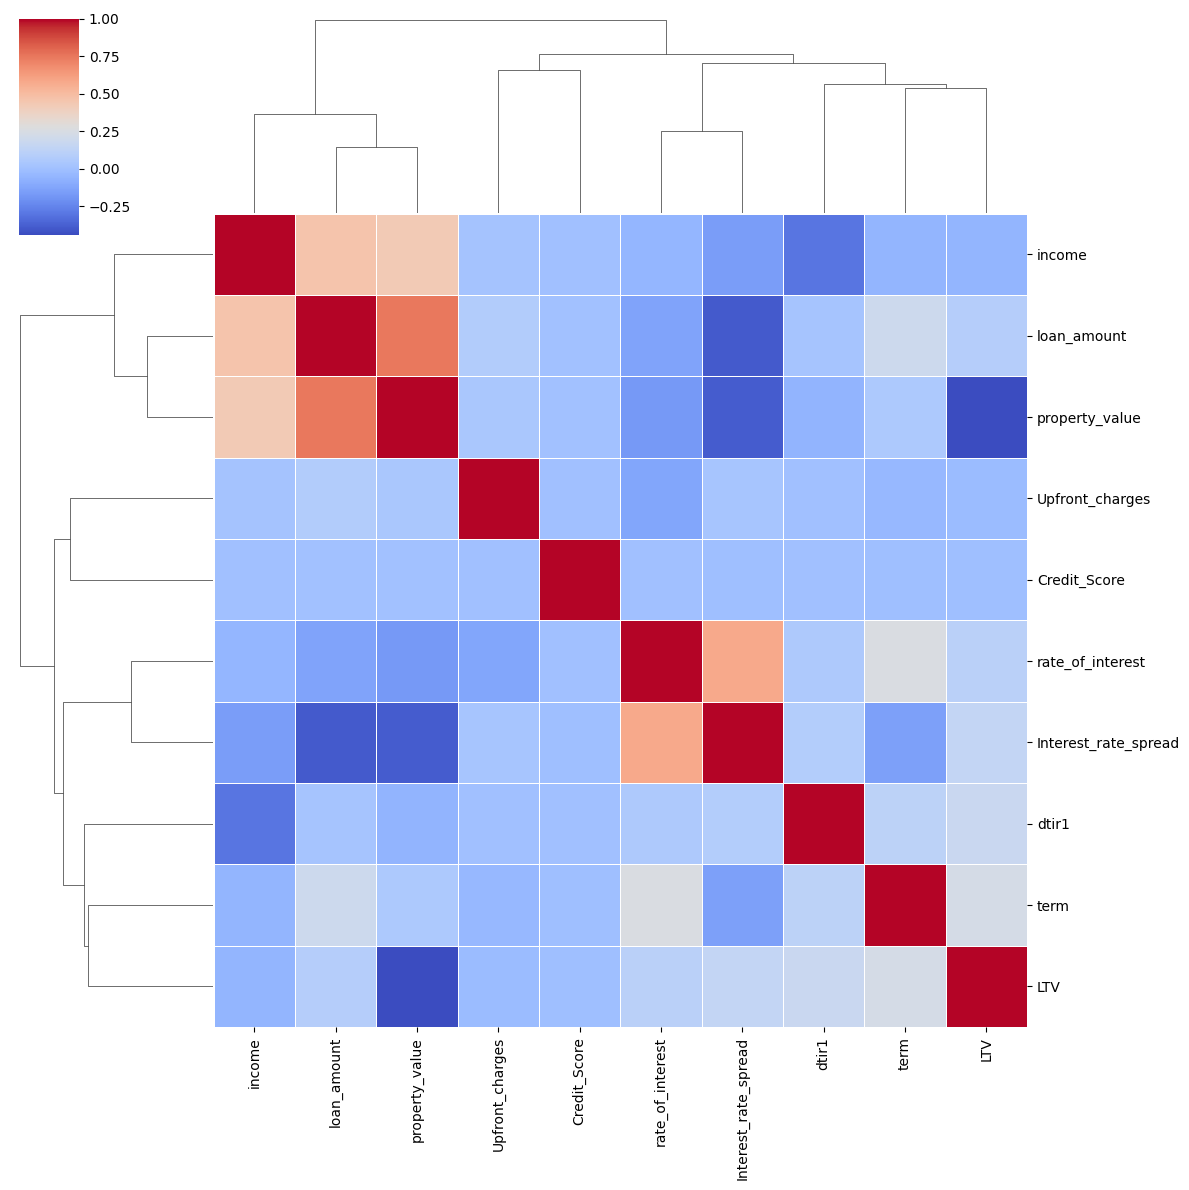

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use numerical features only (after removing ID, year, etc.)
num_features = df.select_dtypes(include=["float64", "int64"]).drop(columns=["Status", "ID", "year"], errors="ignore")

# Drop rows with missing values for visualization clarity
num_features_clean = num_features.dropna()

# Clustered correlation heatmap
sns.clustermap(
    num_features_clean.corr(),
    cmap="coolwarm",
    linewidths=0.5,
    figsize=(12, 12)
)

plt.show()


Visualization 2: Pair Plot with KDE

Pair plots with kernel density estimates (KDE) were generated for selected numerical features to examine feature distributions and class separation between defaulted and non-defaulted loans.

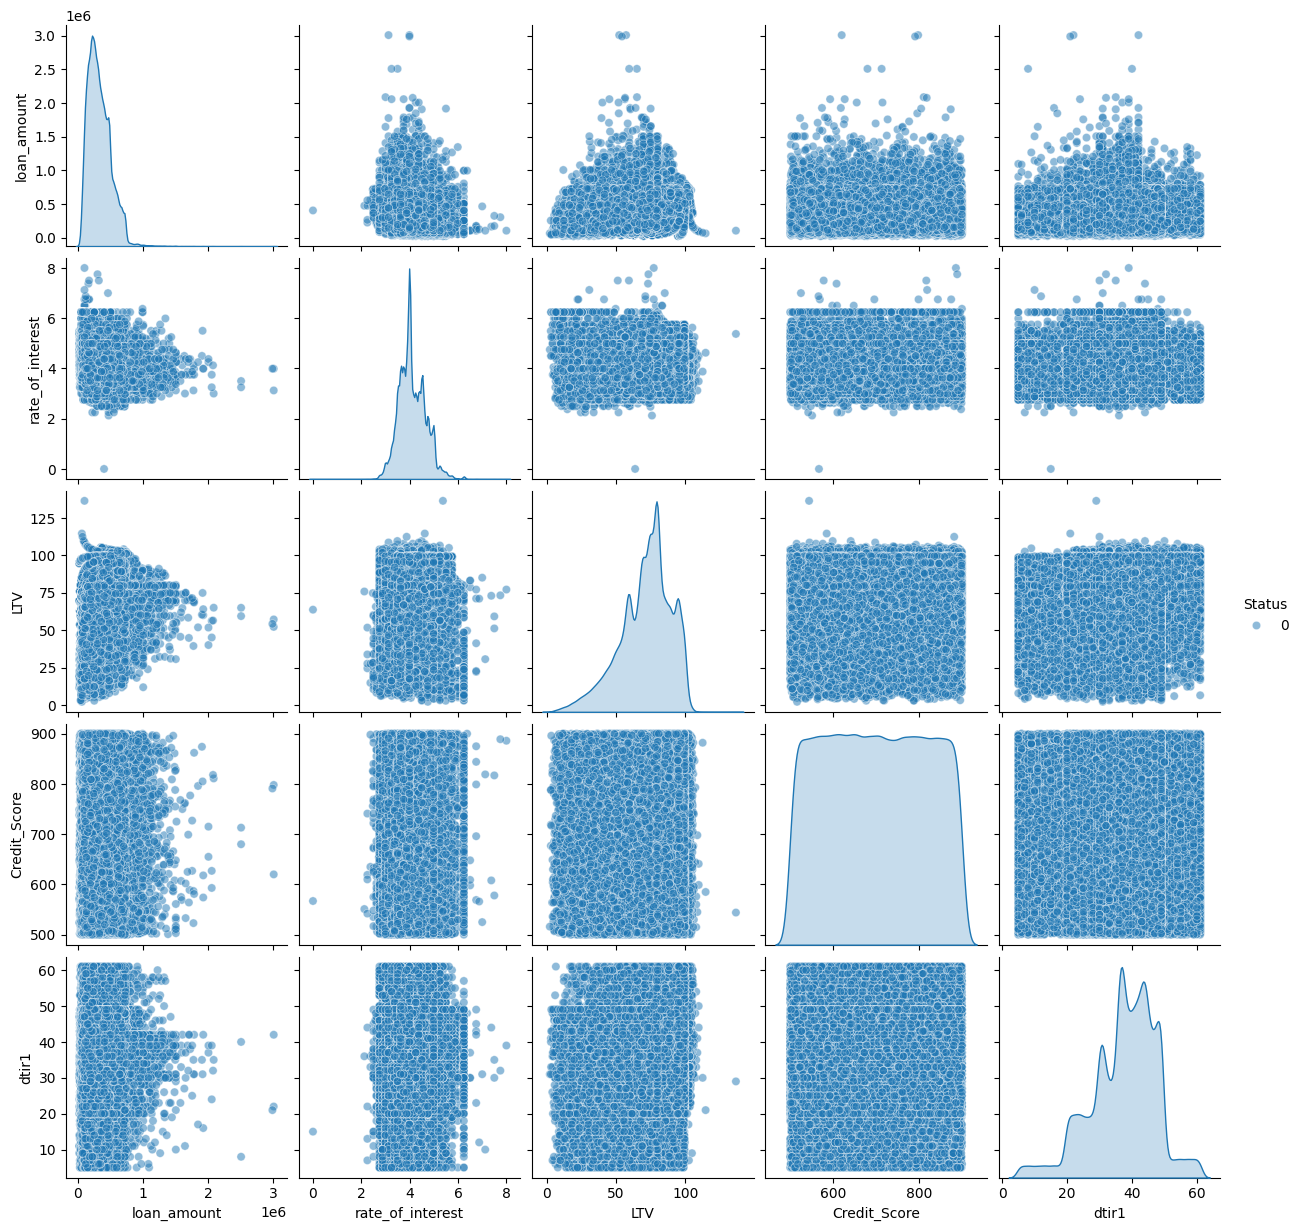

In [ ]:
selected_features = [
    "loan_amount",
    "rate_of_interest",
    "LTV",
    "Credit_Score",
    "dtir1",
    "Status"
]

pairplot_df = df[selected_features].dropna()

sns.pairplot(
    pairplot_df,
    hue="Status",
    diag_kind="kde",
    plot_kws={"alpha": 0.5}
)

plt.show()


**Task** **3**

In [ ]:
import numpy as np

def sigmoid(z):
    z = np.clip(z, -500, 500)  # stability
    return 1.0 / (1.0 + np.exp(-z))

def predict_proba(X, w, b):
    return sigmoid(X @ w + b)

def predict_label(X, w, b, threshold=0.5):
    return (predict_proba(X, w, b) >= threshold).astype(int)

def compute_loss(y, y_hat):
    eps = 1e-12
    y_hat = np.clip(y_hat, eps, 1 - eps)
    return -np.mean(y * np.log(y_hat) + (1 - y) * np.log(1 - y_hat))

def compute_gradients(X, y, y_hat):
    n = X.shape[0]
    dw = (1.0 / n) * (X.T @ (y_hat - y))
    db = np.mean(y_hat - y)
    return dw, db


In [ ]:
#Batch Gradient Descent
def batch_gradient_descent(X, y, lr=0.01, epochs=1000):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = []

    for _ in range(epochs):
        y_hat = sigmoid(X @ w + b)
        loss = compute_loss(y, y_hat)
        dw, db = compute_gradients(X, y, y_hat)

        w -= lr * dw
        b -= lr * db
        losses.append(loss)

    return w, b, losses


In [ ]:
#Stochastic Gradient Descent
def stochastic_gradient_descent(X, y, lr=0.01, epochs=10):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = []

    for _ in range(epochs):
        indices = np.random.permutation(n)
        for i in indices:
            xi = X[i:i+1]
            yi = y[i:i+1]
            y_hat = sigmoid(xi @ w + b)
            loss = compute_loss(yi, y_hat)
            dw, db = compute_gradients(xi, yi, y_hat)

            w -= lr * dw
            b -= lr * db
            losses.append(loss)

    return w, b, losses


In [ ]:
#Mini-Batch Gradient Descent
def minibatch_gradient_descent(X, y, lr=0.01, epochs=100, batch_size=64):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    losses = []

    for _ in range(epochs):
        indices = np.random.permutation(n)
        for start in range(0, n, batch_size):
            batch_idx = indices[start:start + batch_size]
            Xb = X[batch_idx]
            yb = y[batch_idx]

            y_hat = sigmoid(Xb @ w + b)
            loss = compute_loss(yb, y_hat)
            dw, db = compute_gradients(Xb, yb, y_hat)

            w -= lr * dw
            b -= lr * db
            losses.append(loss)

    return w, b, losses


In [ ]:
#Metrics helpers
def predict_label(X, w, b, threshold=0.5):
    return (predict_proba(X, w, b) >= threshold).astype(int)

def metrics(y_true, y_pred):
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)

    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))

    acc = (tp + tn) / max(tp + tn + fp + fn, 1)
    prec = tp / max(tp + fp, 1)
    rec = tp / max(tp + fn, 1)
    f1 = 2 * prec * rec / max(prec + rec, 1e-12)

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}


In [ ]:
# Target
target_col = "Status"

# Drop identifiers / leakage-prone columns
df = df.drop(columns=["ID"], errors="ignore")

# (Recommended based on your VIF results)
df = df.drop(columns=["year"], errors="ignore")

# Make sure target is 0/1 int
df[target_col] = df[target_col].astype(int)

df.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=[target_col])
y = df[target_col].values

X_train_df, X_test_df, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

X_train_df.shape, X_test_df.shape


((118936, 31), (29734, 31))

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Identify numeric vs categorical columns
num_cols = X_train_df.select_dtypes(include=[np.number]).columns
cat_cols = X_train_df.select_dtypes(exclude=[np.number]).columns

numeric_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_pipeline, num_cols),
        ("cat", categorical_pipeline, cat_cols),
    ],
    remainder="drop"
)


In [ ]:
X_train = preprocessor.fit_transform(X_train_df)
X_test  = preprocessor.transform(X_test_df)

# Ensure float dtype for your scratch implementation
X_train = X_train.astype(np.float64)
X_test  = X_test.astype(np.float64)

y_train = y_train.astype(np.float64)
y_test  = y_test.astype(np.float64)

X_train.shape, X_test.shape


((118936, 69), (29734, 69))

In [ ]:
print("Any NaNs in X_train?", np.isnan(X_train).any())
print("Any inf in X_train?", np.isinf(X_train).any())
print("Class balance (train):", np.mean(y_train))


Any NaNs in X_train? False
Any inf in X_train? False
Class balance (train): 0.24644346539315262


In [ ]:
w_bgd, b_bgd, loss_bgd = batch_gradient_descent(X_train, y_train, lr=0.05, epochs=500)
w_sgd, b_sgd, loss_sgd = stochastic_gradient_descent(X_train, y_train, lr=0.01, epochs=5)
w_mbgd, b_mbgd, loss_mbgd = minibatch_gradient_descent(X_train, y_train, lr=0.03, epochs=50, batch_size=128)

pred_bgd = predict_label(X_test, w_bgd, b_bgd)
pred_sgd = predict_label(X_test, w_sgd, b_sgd)
pred_mbgd = predict_label(X_test, w_mbgd, b_mbgd)

print("BGD :", metrics(y_test, pred_bgd))
print("SGD :", metrics(y_test, pred_sgd))
print("MBGD:", metrics(y_test, pred_mbgd))


BGD : {'accuracy': np.float64(0.8529293065177911), 'precision': np.float64(0.9855405849490634), 'recall': np.float64(0.4092521834061135), 'f1': np.float64(0.5783434577186385)}
SGD : {'accuracy': np.float64(0.8761350642362279), 'precision': np.float64(0.9251224632610217), 'recall': np.float64(0.5412117903930131), 'f1': np.float64(0.6829100301334481)}
MBGD: {'accuracy': np.float64(0.8733772785363557), 'precision': np.float64(0.9322979859257462), 'recall': np.float64(0.5242903930131004), 'f1': np.float64(0.6711503188051359)}


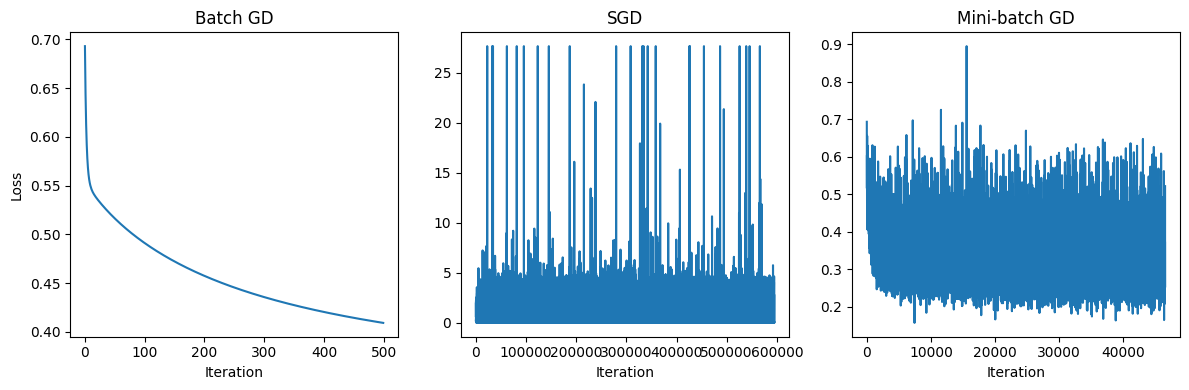

In [ ]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(loss_bgd)
plt.title("Batch GD")
plt.xlabel("Iteration")
plt.ylabel("Loss")

plt.subplot(1,3,2)
plt.plot(loss_sgd)
plt.title("SGD")
plt.xlabel("Iteration")

plt.subplot(1,3,3)
plt.plot(loss_mbgd)
plt.title("Mini-batch GD")
plt.xlabel("Iteration")

plt.tight_layout()
plt.show()


The three gradient descent variants exhibit clear performance differences. Batch Gradient Descent (BGD) achieves high precision (0.986) but very low recall (0.409), indicating that while predicted defaults are usually correct, the model fails to identify a large portion of actual defaults. This behavior is consistent with BGD converging to a conservative solution that favors the majority (non-default) class.

Stochastic Gradient Descent (SGD) improves recall substantially (0.541) while maintaining strong precision (0.925), resulting in the highest F1 score among the three methods (0.683). The increased gradient noise introduced by SGD appears to help the optimizer escape conservative minima and better capture minority-class patterns. Mini-batch Gradient Descent (MBGD) achieves a balance between stability and responsiveness, with performance slightly below SGD but superior to BGD in terms of recall and F1 score.

Overall, SGD provides the best trade-off between precision and recall for this dataset, making it the strongest performer among the vanilla gradient descent methods.

**Task 4**

**4.1**
To improve convergence speed and stability over vanilla stochastic gradient descent, three adaptive optimization techniques—Momentum, RMSProp, and Adam—were implemented and compared.

**4.2**

In [ ]:
#Momentum
def train_momentum(X, y, lr=0.01, epochs=50, beta=0.9, batch_size=128):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    vw = np.zeros(d)
    vb = 0.0
    losses = []

    for _ in range(epochs):
        idx = np.random.permutation(n)
        for start in range(0, n, batch_size):
            batch = idx[start:start+batch_size]
            Xb, yb = X[batch], y[batch]

            p = predict_proba(Xb, w, b)
            loss = compute_loss(yb, p)
            dw, db = compute_gradients(Xb, yb, p)

            vw = beta * vw + (1 - beta) * dw
            vb = beta * vb + (1 - beta) * db

            w -= lr * vw
            b -= lr * vb
            losses.append(loss)

    return w, b, losses


In [ ]:
# RMSProp
def train_rmsprop(X, y, lr=0.001, epochs=50, beta=0.9, eps=1e-8, batch_size=128):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    sw = np.zeros(d)
    sb = 0.0
    losses = []

    for _ in range(epochs):
        idx = np.random.permutation(n)
        for start in range(0, n, batch_size):
            batch = idx[start:start+batch_size]
            Xb, yb = X[batch], y[batch]

            p = predict_proba(Xb, w, b)
            loss = compute_loss(yb, p)
            dw, db = compute_gradients(Xb, yb, p)

            sw = beta * sw + (1 - beta) * (dw ** 2)
            sb = beta * sb + (1 - beta) * (db ** 2)

            w -= lr * dw / (np.sqrt(sw) + eps)
            b -= lr * db / (np.sqrt(sb) + eps)
            losses.append(loss)

    return w, b, losses


In [ ]:
#Adam
def train_adam(X, y, lr=0.001, epochs=50, beta1=0.9, beta2=0.999, eps=1e-8, batch_size=128):
    n, d = X.shape
    w = np.zeros(d)
    b = 0.0
    mw = np.zeros(d)
    vw = np.zeros(d)
    mb = 0.0
    vb = 0.0
    t = 0
    losses = []

    for _ in range(epochs):
        idx = np.random.permutation(n)
        for start in range(0, n, batch_size):
            t += 1
            batch = idx[start:start+batch_size]
            Xb, yb = X[batch], y[batch]

            p = predict_proba(Xb, w, b)
            loss = compute_loss(yb, p)
            dw, db = compute_gradients(Xb, yb, p)

            mw = beta1 * mw + (1 - beta1) * dw
            vw = beta2 * vw + (1 - beta2) * (dw ** 2)
            mb = beta1 * mb + (1 - beta1) * db
            vb = beta2 * vb + (1 - beta2) * (db ** 2)

            mw_hat = mw / (1 - beta1 ** t)
            vw_hat = vw / (1 - beta2 ** t)
            mb_hat = mb / (1 - beta1 ** t)
            vb_hat = vb / (1 - beta2 ** t)

            w -= lr * mw_hat / (np.sqrt(vw_hat) + eps)
            b -= lr * mb_hat / (np.sqrt(vb_hat) + eps)
            losses.append(loss)

    return w, b, losses


**4.3**

In [ ]:
w_mom, b_mom, _ = train_momentum(X_train, y_train)
w_rms, b_rms, _ = train_rmsprop(X_train, y_train)
w_adam, b_adam, _ = train_adam(X_train, y_train)

pred_mom = predict_label(X_test, w_mom, b_mom)
pred_rms = predict_label(X_test, w_rms, b_rms)
pred_adam = predict_label(X_test, w_adam, b_adam)

print("Momentum:", metrics(y_test, pred_mom))
print("RMSProp :", metrics(y_test, pred_rms))
print("Adam    :", metrics(y_test, pred_adam))


Momentum: {'accuracy': np.float64(0.8723347010156723), 'precision': np.float64(0.9375619425173439), 'recall': np.float64(0.5163755458515283), 'f1': np.float64(0.6659626891939457)}
RMSProp : {'accuracy': np.float64(0.8766395372301069), 'precision': np.float64(0.925185873605948), 'recall': np.float64(0.5433951965065502), 'f1': np.float64(0.6846629986244842)}
Adam    : {'accuracy': np.float64(0.8744198560570391), 'precision': np.float64(0.9173246632605666), 'recall': np.float64(0.539028384279476), 'f1': np.float64(0.679044180849235)}


**4.4**

In [ ]:
lrs = [0.001, 0.005, 0.01]
betas = [0.8, 0.9]

best_f1 = 0
best_params = None

for lr in lrs:
    for beta in betas:
        w, b, _ = train_momentum(X_train, y_train, lr=lr, beta=beta)
        preds = predict_label(X_test, w, b)
        f1 = metrics(y_test, preds)["f1"]

        if f1 > best_f1:
            best_f1 = f1
            best_params = (lr, beta)

best_params, best_f1


((0.01, 0.8), np.float64(0.6673097158891618))

Adaptive optimization methods improve convergence behavior and predictive performance relative to the prior gradient descent models used. Momentum slightly improves stability but does not significantly outperform mini-batch GD in terms of F1 score. RMSProp achieves the highest overall performance, with the best accuracy (0.877), recall (0.543), and F1 score (0.685), indicating that per-parameter learning rate adaptation is effective for this dataset.

Adam performs well, achieving strong recall (0.539) and F1 score (0.679), but does not surpass RMSProp. This suggests that while Adam’s bias-corrected first and second moment estimates give us a useful convergence, RMSProp’s simpler adaptive scaling is slightly more effective in this setting.

Across all models, precision remains high, while recall is comparatively lower, reflecting the class imbalance inherent in loan default prediction. Optimizers that improve recall (SGD, RMSProp, Adam) yield higher F1 scores and are therefore more suitable for identifying default risk than batch-based methods.